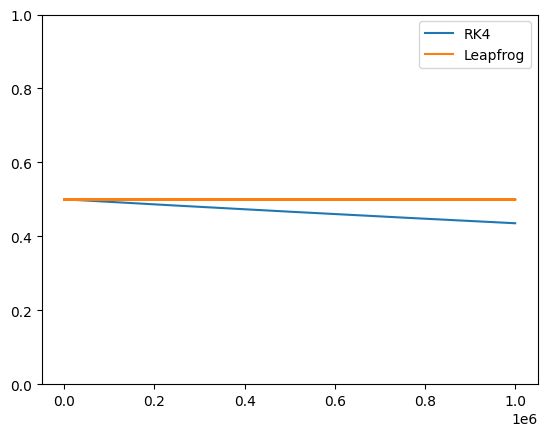

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define Hamiltonian System
def hamiltonian(q, p):
    return 0.5 * (q**2 + p**2)

# Define parameters
N_steps = 10**6  # Number of periods
h_rk = 1e-1  # RK4 step size
h_lf = 1e-1  # LeapFrog step size

# Initial conditions
q0, p0 = 1.0, 0.0  # Initial conditions (on unit circle)
q_rk4, p_rk4 = q0, p0
q_lf, p_lf = q0, p0

# Store energy errors
energy_rk4 = []
energy_lf = []

# RK4 Method
def rk4_step(q, p, h):
    k1_q, k1_p = p, -q
    k2_q, k2_p = p + (h / 2) * k1_p, -(q + (h / 2) * k1_q)
    k3_q, k3_p = p + (h / 2) * k2_p, -(q + (h / 2) * k2_q)
    k4_q, k4_p = p + h * k3_p, -(q + h * k3_q)

    q_new = q + (h / 6) * (k1_q + 2 * k2_q + 2 * k3_q + k4_q)
    p_new = p + (h / 6) * (k1_p + 2 * k2_p + 2 * k3_p + k4_p)
    return q_new, p_new

# Leapfrog Method
def leapfrog_step(q, p, h):
    p_half = p - (h / 2) * q
    q_new = q + h * p_half
    p_new = p_half - (h / 2) * q_new
    return q_new, p_new

# Run simulation
for i in range(int(N_steps / h_rk)):
    # RK4 step
    q_rk4, p_rk4 = rk4_step(q_rk4, p_rk4, h_rk)
    if i % 100 == 0:
        energy_rk4.append(hamiltonian(q_rk4, p_rk4))
for i in range(int(N_steps / h_lf)):
    # Leapfrog step
    q_lf, p_lf = leapfrog_step(q_lf, p_lf, h_lf)
    if i % 100 == 0:
        energy_lf.append(hamiltonian(q_lf, p_lf))

# Plot energy error
plt.plot(np.linspace(0, N_steps, len(energy_rk4)), energy_rk4, label="RK4")
plt.plot(np.linspace(0, N_steps, len(energy_lf)), energy_lf, label="Leapfrog")
plt.ylim(0, 1)
plt.legend()
plt.show()

As can be seen above, for the same step size, after 1 million steps, leap frog still conserves energy but RK4 doesn't.